# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Summary Analysis

There is strong correlation between Max temp and latitude, positive for NH, negative for SH.

As expected, there is little to no correlation between latitude and humidity, cloudiness.

There is also little to no correlation between latitude and wind speed.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
city_name=[]
lats = []
lngs = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
county = []
date = []
city_record =[]
cityid = []

count=0
index_count=1

for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        response = requests.get(query_url)
        weatherdata = response.json()

        city_name.append(weatherdata['name'])
        lats.append(weatherdata['coord']['lat'])
        lngs.append(weatherdata['coord']['lon'])
        max_temp.append(weatherdata['main']['temp_max'])
        humidity.append(weatherdata['main']['humidity'])
        cloudiness.append(weatherdata['clouds']['all'])
        wind_speed.append(weatherdata['wind']['speed'])
        county.append(weatherdata['sys']['country'])
        date.append(weatherdata['dt'])
        city_record = weatherdata['name']
        cityid = weatherdata['id']
        print(f"Processing Record {cityid} | {city_record}")
        time.sleep(1)
    except:
        print("City not found. Moving on...")
    continue
    


Processing Record 1529484 | Kumul
Processing Record 3883457 | Lebu
Processing Record 5969025 | Haines Junction
Processing Record 5122534 | Jamestown
Processing Record 448149 | Sinjār
Processing Record 6144312 | Sept-Îles
Processing Record 935215 | Saint-Philippe
Processing Record 3831208 | Qaanaaq
Processing Record 3471683 | Arcos
Processing Record 2075265 | Busselton
Processing Record 6201424 | Mataura
Processing Record 4035715 | Avarua
Processing Record 962367 | Richards Bay
Processing Record 1861280 | Itoman
Processing Record 6148373 | Sioux Lookout
Processing Record 5106841 | Albany
Processing Record 671966 | Odoreu
Processing Record 3421193 | Paamiut
Processing Record 2156643 | Mount Gambier
Processing Record 1507390 | Dikson
Processing Record 5601615 | Mountain Home
City not found. Moving on...
City not found. Moving on...
Processing Record 146490 | Chlórakas
Processing Record 3874787 | Punta Arenas
Processing Record 779350 | Karasjok
Processing Record 217389 | Demba
City not fou

Processing Record 1150489 | Tak
Processing Record 2272491 | Zwedru
Processing Record 3421765 | Nanortalik
Processing Record 2012530 | Zhigansk
Processing Record 1213855 | Sibolga
Processing Record 933995 | Souillac
Processing Record 506123 | Poselki
Processing Record 4946620 | Palmer
Processing Record 1337610 | Thinadhoo
Processing Record 2112309 | Katsuura
Processing Record 3453420 | Planaltina
Processing Record 3347019 | Mossamedes
Processing Record 1328421 | Pathein
Processing Record 3664716 | Canutama
Processing Record 2027042 | Batagay-Alyta
Processing Record 1257237 | Sārangpur
Processing Record 2092164 | Lorengau
Processing Record 3932145 | Pisco
Processing Record 5983607 | Inuvik
Processing Record 5870133 | Nome
Processing Record 2174444 | Bowen
Processing Record 2208248 | Kaitangata
Processing Record 4726521 | San Patricio
Processing Record 2136150 | Luganville
City not found. Moving on...
Processing Record 915471 | Kalabo
Processing Record 5962442 | Goderich
Processing Record

Processing Record 1147540 | Baghlan
Processing Record 2155858 | Nambucca Heads
Processing Record 2129868 | Iwanai
Processing Record 64435 | Berbera
City not found. Moving on...
Processing Record 2396518 | Port-Gentil
Processing Record 3470137 | Belmonte
Processing Record 3841956 | Paraná
Processing Record 1185092 | Thakurgaon
Processing Record 7671223 | Kloulklubed
Processing Record 1540475 | Turtas
Processing Record 2109528 | Buala
Processing Record 1261012 | Osmanabad
Processing Record 3567834 | Baracoa
Processing Record 2142316 | Yeppoon
Processing Record 1090415 | Chirongui
Processing Record 5970234 | Hanna
Processing Record 5354943 | Half Moon Bay
Processing Record 1808106 | Hongjiang
Processing Record 4956335 | Yarmouth
Processing Record 5122331 | Irondequoit
Processing Record 3894426 | Coyhaique
Processing Record 2460954 | Araouane
Processing Record 1732826 | Mersing
Processing Record 6316343 | Alta Floresta
Processing Record 5935804 | Dawson Creek
Processing Record 3703239 | Pe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
weatherdict = {"City": cities,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": county,
    "Date": date,
    }



weatherdff = pd.DataFrame.from_dict(weatherdict, orient='index')
weatherdf = weatherdff.transpose()
cleanweatherdf = weatherdf.dropna(how='any')
cleanweatherdf.to_csv(r'/Users/Michael/Documents/GT DA/python-api-challenge/WeatherPy/weatherdata.csv', index=False)

In [55]:
cleanweatherdf

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hami,42.8,93.45,279.65,51,38,1.81,CN,1603063013
1,lebu,-37.62,-73.65,284.37,74,0,2.35,CL,1603063045
2,haines junction,60.75,-137.51,269.85,78,100,0.53,CA,1603063247
3,jamestown,42.1,-79.24,284.26,87,90,3.6,US,1603063064
4,sinjar,36.32,41.88,290.15,36,0,1.68,IQ,1603063249
5,sept-iles,50.2,-66.38,278.15,100,75,1.5,CA,1603063250
6,saint-philippe,-21.36,55.77,294.15,64,19,1.5,RE,1603063073
7,qaanaaq,77.48,-69.36,272.11,89,95,2.79,GL,1603062998
8,arcos,-20.28,-45.54,294.69,75,78,4.24,BR,1603063254
9,busselton,-33.65,115.33,290.37,55,9,4.05,AU,1603062963


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
high_humidity = cleanweatherdf.loc[(cleanweatherdf["Humidity"] > 100)]
high_humidity

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.

# None in dataset

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# No humidity outliers, data is cleaned with Nan values removed.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

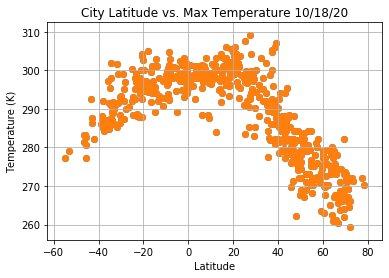

In [70]:
latitude = cleanweatherdf['Latitude']
temperature = cleanweatherdf['Max Temp']
plt.scatter(latitude, temperature)
plt.grid()
plt.title("City Latitude vs. Max Temperature 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")

plot1 = plt.scatter(latitude, temperature)
fig = plot1.get_figure()
fig.savefig("LvT.png")

## Latitude vs. Humidity Plot

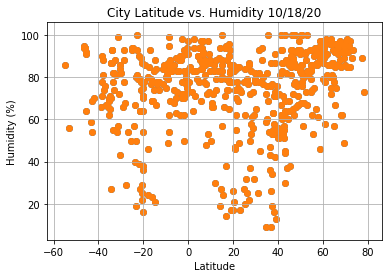

In [69]:
humidity = cleanweatherdf['Humidity']

plt.scatter(latitude, humidity)
plt.grid()
plt.title("City Latitude vs. Humidity 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plot2 = plt.scatter(latitude, humidity)
fig = plot2.get_figure()
fig.savefig("LvH.png")

## Latitude vs. Cloudiness Plot

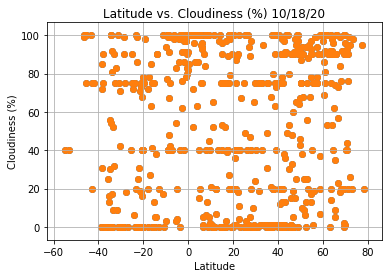

In [73]:
cloudiness = cleanweatherdf['Cloudiness']

plt.scatter(latitude, cloudiness)
plt.grid()
plt.title("Latitude vs. Cloudiness (%) 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plot3 = plt.scatter(latitude, cloudiness)
fig = plot3.get_figure()
fig.savefig("LvC.png")

## Latitude vs. Wind Speed Plot

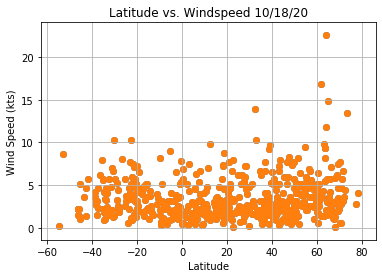

In [77]:
windspeed = cleanweatherdf['Wind Speed']

plt.scatter(latitude, windspeed)
plt.title("Latitude vs. Windspeed 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kts)")
plt.grid()

plot4 = plt.scatter(latitude, windspeed)
fig = plot4.get_figure()
fig.savefig("LvWS.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


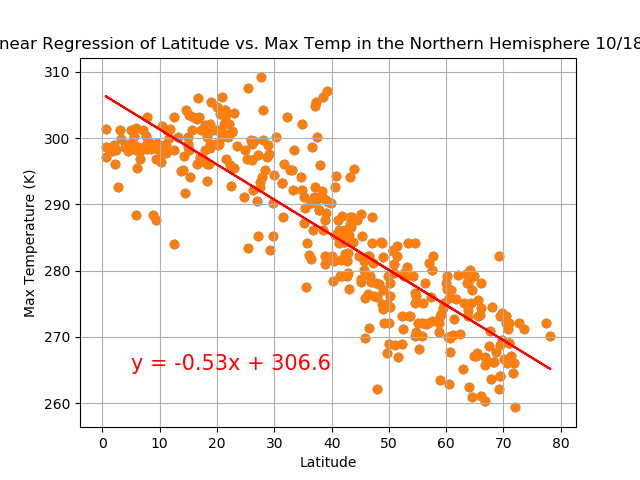

R Value: -0.8719142013188947


In [118]:
northernhemisphere = cleanweatherdf.loc[(cleanweatherdf['Latitude'] >= 0)]
nhlat = northernhemisphere['Latitude']
nhtemp = northernhemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nhlat.astype(float), nhtemp.astype(float))
regress_values = nhlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nhlat, nhtemp)
plt.plot(nhlat, regress_values, "r-")
plt.annotate(line_eq,(5,265),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Max Temp in the Northern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
print(f"R Value: {rvalue}")

plot5 = plt.scatter(nhlat, nhtemp)
fig = plot5.get_figure()
fig.savefig("LvTNorthHemisRegress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


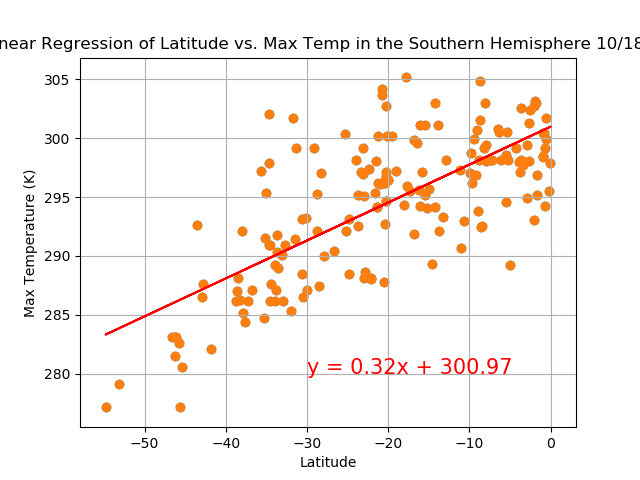

R Value: 0.7211828048913415


In [119]:
southernhemisphere = cleanweatherdf.loc[(cleanweatherdf['Latitude'] <= 0)]
shlat = southernhemisphere['Latitude']
shtemp = southernhemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(shlat.astype(float), shtemp.astype(float))
regress_values2 = shlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(shlat, shtemp)
plt.plot(shlat, regress_values2, "r-")
plt.annotate(line_eq,(-30,280),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Max Temp in the Southern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
print(f"R Value: {rvalue}")

plot6 = plt.scatter(shlat, shtemp)
fig = plot6.get_figure()
fig.savefig("LvTSouthHemisRegress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


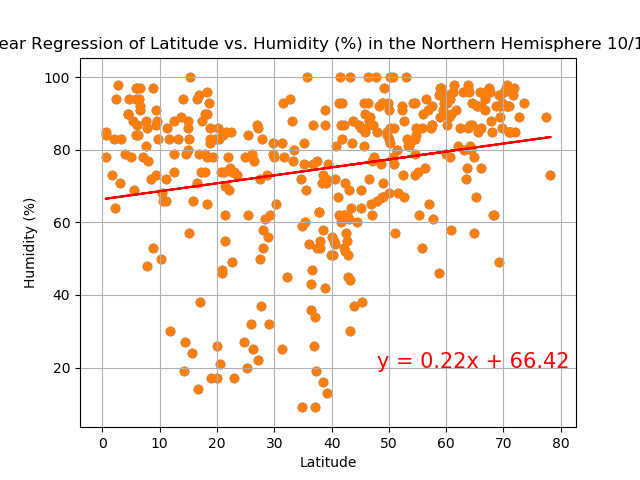

R Value: 0.22031273681544486


In [125]:
nhhumidity = northernhemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nhlat.astype(float), nhhumidity.astype(float))
regress_values3 = nhlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nhlat, nhhumidity)
plt.plot(nhlat, regress_values3, "r-")
plt.annotate(line_eq,(48,20),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Humidity (%) in the Northern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"R Value: {rvalue}")

plot7 = plt.scatter(nhlat, nhhumidity)
fig = plot7.get_figure()
fig.savefig("LvHumidityNorthHemisRegress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


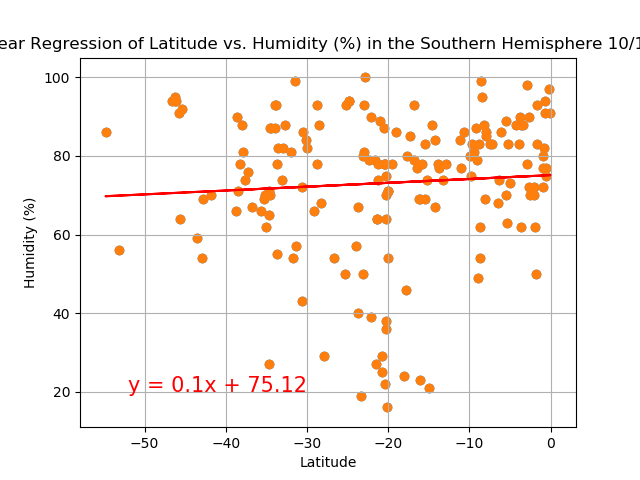

R Value: 0.07100944170976896


In [127]:
shhumidity = southernhemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(shlat.astype(float), shhumidity.astype(float))
regress_values4 = shlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(shlat, shhumidity)
plt.plot(shlat, regress_values4, "r-")
plt.annotate(line_eq,(-52,20),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Humidity (%) in the Southern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"R Value: {rvalue}")

plot7 = plt.scatter(shlat, shhumidity)
fig = plot7.get_figure()
fig.savefig("LvHumiditySouthHemisRegress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


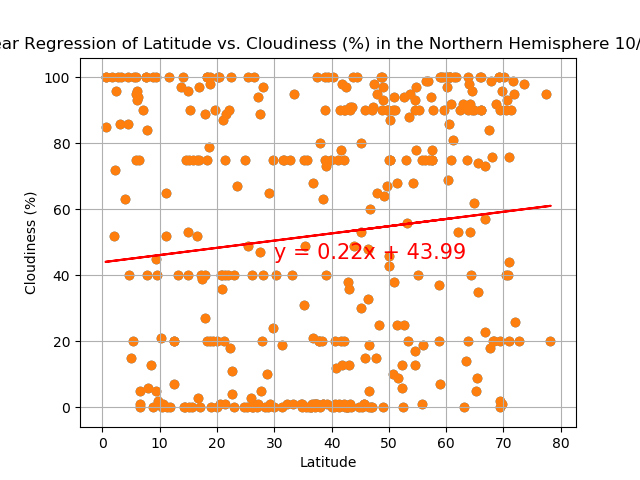

R Value: 0.1146337232143421


In [129]:
nhclouds = northernhemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nhlat.astype(float), nhclouds.astype(float))
regress_values5 = nhlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nhlat, nhclouds)
plt.plot(nhlat, regress_values5, "r-")
plt.annotate(line_eq,(30,45),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Cloudiness (%) in the Northern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"R Value: {rvalue}")

plot9 = plt.scatter(nhlat, nhclouds)
fig = plot9.get_figure()
fig.savefig("LvCloudsNorthHemisRegress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


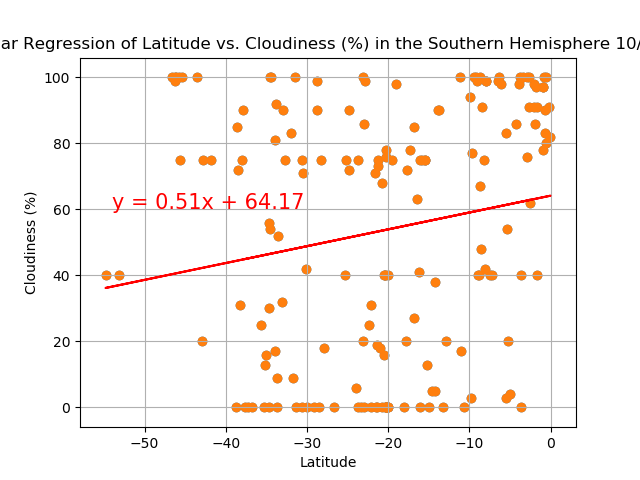

R Value: 0.17831311037736494


In [131]:
shclouds = southernhemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(shlat.astype(float), shclouds.astype(float))
regress_values6 = shlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(shlat, shclouds)
plt.plot(shlat, regress_values6, "r-")
plt.annotate(line_eq,(-54,60),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Cloudiness (%) in the Southern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"R Value: {rvalue}")

plot9 = plt.scatter(shlat, shclouds)
fig = plot9.get_figure()
fig.savefig("LvCloudsSouthHemisRegress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


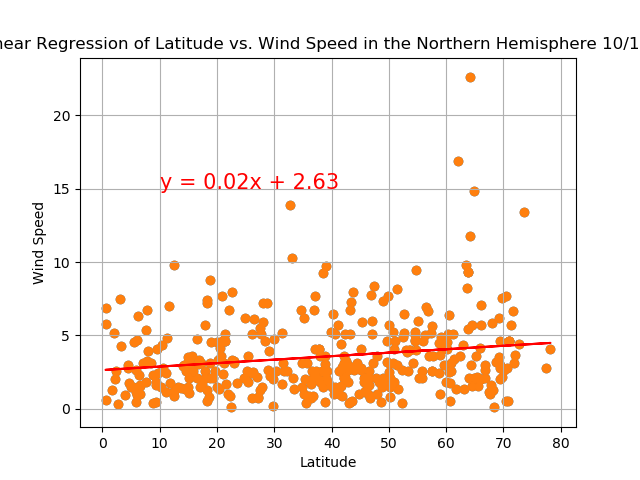

R Value: 0.181072511214887


In [134]:
nhwind = northernhemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nhlat.astype(float), nhwind.astype(float))
regress_values7 = nhlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nhlat, nhwind)
plt.plot(nhlat, regress_values7, "r-")
plt.annotate(line_eq,(10,15),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Wind Speed in the Northern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"R Value: {rvalue}")

plot10 = plt.scatter(nhlat, nhwind)
fig = plot10.get_figure()
fig.savefig("LvWindNorthHemisRegress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


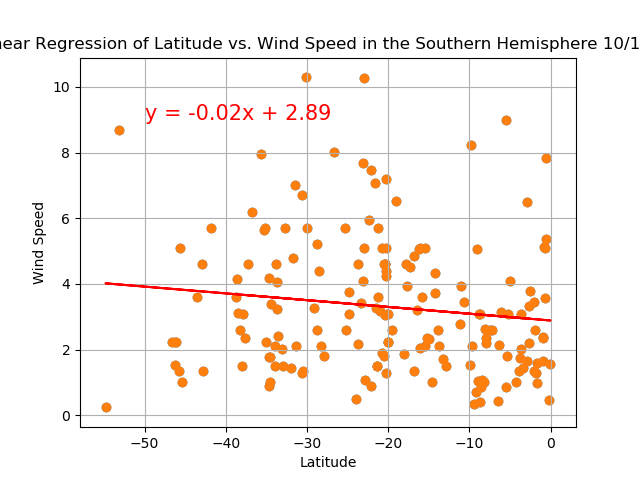

R Value: -0.13317697386797758


In [136]:
shwind = southernhemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(shlat.astype(float), shwind.astype(float))
regress_values8 = shlat.astype(float) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(shlat, shwind)
plt.plot(shlat, regress_values8, "r-")
plt.annotate(line_eq,(-50,9),fontsize=15,color='red')
plt.grid()
plt.title("Linear Regression of Latitude vs. Wind Speed in the Southern Hemisphere 10/18/20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"R Value: {rvalue}")

plot10 = plt.scatter(shlat, shwind)
fig = plot10.get_figure()
fig.savefig("LvWindSouthHemisRegress.png")